# SUMMARIZATION TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT SUMMARIZATION TECHNIQUES

### SECOND DATASET - MULTINEWS WITH DISCUSSION ABOUT A STORY

In [7]:
import pandas as pd
import re

# Define the file paths
src_file = 'datasets/multi_news/val.txt.src'  
tgt_file = 'datasets/multi_news/val.txt.tgt' 

# Load the .txt.src file (source articles)
with open(src_file, 'r', encoding='utf-8') as src:
    articles = src.readlines()

# Load the .txt.tgt file (target summaries)
with open(tgt_file, 'r', encoding='utf-8') as tgt:
    summaries = tgt.readlines()

dict_multinews = {'articles': articles, 
                 'summary': summaries}


# Create DataFrames
multinews_df = pd.DataFrame(dict_multinews)

# Clean the newlines from both columns
multinews_df['articles'] = multinews_df['articles'].str.strip()
multinews_df['summary'] = multinews_df['summary'].str.strip()

text = multinews_df.iloc[4].articles
original_summary =  multinews_df.iloc[4].summary
print(f'The summary of the articles is:\n{final_summary_1}')
articles = text.split('.  ')
articles = [article.strip() for article in articles]


df_sum_3 = pd.DataFrame()
# Assign the list of articles to a new column named 'content'
df_sum_3['content'] = articles

The summary of the articles is:
– a lengthy report in the new york times , based on thousands of documents shared by the guardian via edward snowden , offers an in-depth look at an agency that can " seem omniscient , " with eyes everywhere tracking even the smallest matters . the material obtained — whether years of stored text messages , " gigabytes of credit card purchases , " or eavesdropped conversations — can be of great value : scott shane writes about operations that stopped a terrorist plot against a swedish illustrator , helped kennedy international airport battle chinese human smugglers , and gave the colombian army details of farc rebel plans . but plenty of collected data is never looked at , despite the effort to obtain it . and some material seems hardly useful ; the paper cites the agency ' s successful grab at un secretary-general ban ki-moon ' s talking points for a meeting with president obama . meanwhile , despite the nsa ' s incredible reach in afghanistan , it hasn

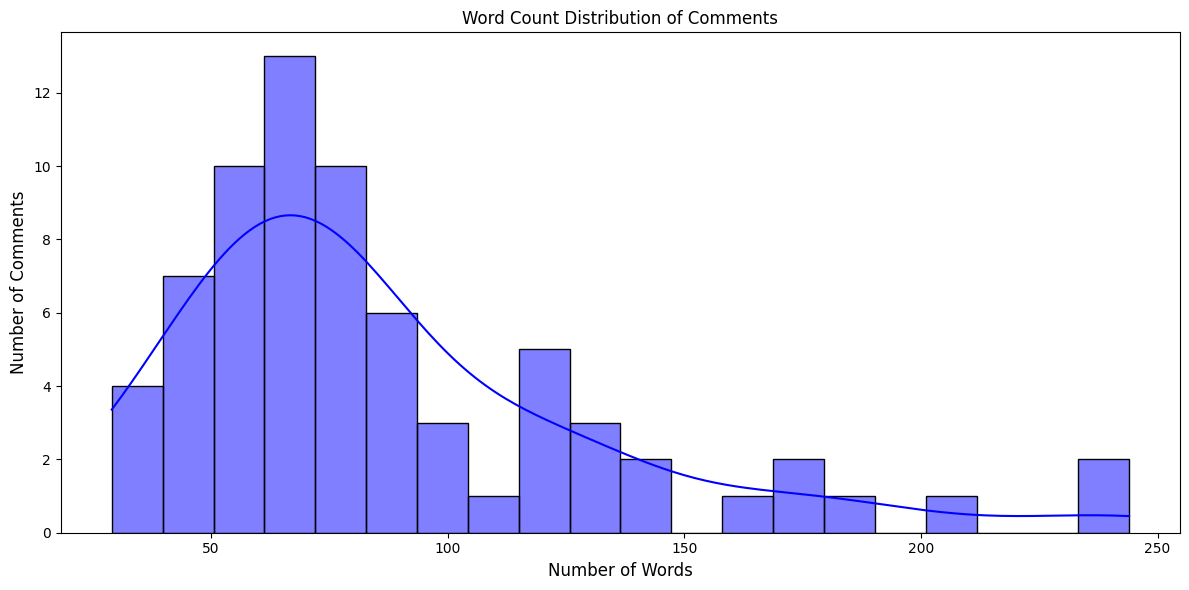

In [3]:
from utils.plot_words_distribution import plot_distribution_of_words

text_col = 'content'

# plot the distribution of words
plot_distribution_of_words(df_sum_3, text_col)

In [4]:
from utils.load_prompts import load_chosen_prompt
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split

# load the final dataset and the language
df_sum_3, _ = load_pretrained_model(df=df_sum_3, text_col=text_col)

# load the prompt template
prompt_template = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The language of the dataset is: en
The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


### 1ST SUMMARIZATION TECHNIQUE: SEPARATE COMMENTS RANDOMLY INTO GROUPS

We are going to implement a simple technique by grouping the comments/reviews into groups randomly, create a summary for each group of comments and finally a final summarization based on the summaries of group of comments

In [8]:
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments

language = 'English'
topic = "NSA surveillance and intelligence operations"

# divide the comments into groups
groups_1 = divide_comments_by_time(df_sum_3, text_column='content')

#create the summaries
summaries_1 = create_summary_for_groups_of_comments(groups=groups_1, prompt=prompt_template, gpt_model='gpt-4o', language=language, topic=topic)

Comments do not contain timestamp. Continue the group by shuffle them.


  7%|█████████████▌                                                                                                                                                                                             | 1/15 [00:02<00:36,  2.60s/it]

The comments highlight several significant aspects of NSA surveillance and intelligence operations. One recurring theme is the breadth and scope of NSA activities, such as "SIGINT development" capturing data from a Somali internet service (Globalsom) in 2009. Another comment emphasizes the complex and paradoxical nature of intelligence work, detailing a 2010 operation, IronAvenger, where the NSA spied on both an ally and an adversary to uncover a spear-phishing attempt.

The substantial pressure on the NSA to gather extensive information, compounded by a significant budget and minimal public oversight, has occasionally resulted in overreach, leading to scrutiny by the Foreign Intelligence Surveillance Court. The post-9/11 era ushered in a considerable expansion and decentralization of the NSA, with facilities spread across several US states and operations conducted globally from locations like England, Australia, and various military bases.

Field operations also play a critical role; 

 13%|███████████████████████████                                                                                                                                                                                | 2/15 [00:04<00:28,  2.23s/it]

The comments provide various insights into NSA surveillance and intelligence operations. They reveal the extensive nature of NSA's data collection, including the Dishfire database storing global text messages and Tracfin accumulating credit card transactions. Techniques like Polarbreeze and initiatives like Snacks for social network analysis demonstrate the agency’s sophisticated data-gathering capabilities.

One comment underscores the limits of NSA's tactical operations in achieving strategic success, especially in Afghanistan. The disclosures from Edward Snowden underscore the perception of NSA as overly intrusive, sparking both political and operational consequences. There's a discussion about how the NSA’s pervasive surveillance methods have led to discontent among global leaders, such as Brazil's president, with wide-reaching diplomatic repercussions.

Additionally, the elite Transgression Branch, established in 2009, is mentioned for exploiting the work of other hackers. Another

 20%|████████████████████████████████████████▌                                                                                                                                                                  | 3/15 [00:06<00:24,  2.02s/it]

The comments elucidate diverse facets of NSA surveillance and intelligence operations. A notable achievement was the reduction in volume, which enabled new collection efforts focused on Iranian leadership and diplomats from Saudi Arabia and Syria. Meanwhile, the NSA's closely monitored Venezuelan economic officials, revealing how personal communications were scrutinized to gain minor policy insights.

Another comment underscores the routine nature of high-level discussions, such as the one between UN Secretary-General Ban Ki-moon and President Obama concerning Syrian chemical weapons, the Israeli-Palestinian conflict, and climate change.

A detailed daily report from Kandahar in June 2011 highlights the exhaustive nature of eavesdropping in Taliban strongholds, emphasizing the sheer volume of information processed.

Technological advancements have significantly benefited the agency. For example, NSA analysts tracked a top Al Qaeda leader in Africa via his electronic trail, allowing law

 27%|██████████████████████████████████████████████████████▏                                                                                                                                                    | 4/15 [00:08<00:22,  2.09s/it]

The comments provide various perspectives on NSA surveillance and intelligence operations. One key theme is the technical sophistication and collaboration within the intelligence community. Analysts discuss using specific tools like Heretic and Nucleon to scan documents, personnel assignments, and strategies, reflecting the specialized and detailed nature of their work.

There’s a recurring concern about the impact of Snowden disclosures, with opinions divided on whether these revelations will lead to lasting reforms. Joel F. Brenner, the NSA's former inspector general, defends the agency, suggesting it faces undue criticism for effective operations.

Questions about privacy also emerge, especially regarding foreign citizens using American internet services and the potential market impact on American tech companies due to their collaboration with the NSA. The agency’s weakening of encryption technologies raises further anxiety about overall internet security.

Another comment highlight

 33%|███████████████████████████████████████████████████████████████████▋                                                                                                                                       | 5/15 [00:11<00:23,  2.32s/it]

The comments reflect various facets of NSA surveillance and intelligence operations, highlighting the complexity and intricacies involved. One theme discusses the selective sharing of SIGINT (signals intelligence) between allied nations. For instance, though the NSA and Britain’s GCHQ share information, certain data, such as economic intelligence, remains confidential to national interests, sometimes causing diplomatic friction, as with Germany’s exclusion from the "9-eyes" group. This nuanced sharing occurs even with nations like Israel, which are also CIA targets.

Another focal point is the NSA’s operational successes, such as intercepting 478 emails from a jihadist plot and identifying Chinese human smugglers via names and flight numbers. This capability extends to exhaustive eavesdropping missions, exemplified by the agency’s securing of Bali’s police chief's cellphone number during a climate change conference through operations in Australia.

The NSA’s Tailored Access Operations 

 40%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 6/15 [00:14<00:22,  2.47s/it]

The comments provide numerous insights into NSA surveillance and intelligence operations. One comment discusses the agency's complex cyber operations, showcasing a dual advantage in espionage by infiltrating hostile government computers and concurrently assessing an ally’s cyber capabilities, epitomizing the agency's specialty in such dual-purpose intelligence missions.

A specific instance highlights the sophisticated eavesdropping on Ayatollah Khamenei’s aides, capturing logistical discussions and his gender-segregated public address in a soccer field, reflecting the extensive reach and detailed nature of NSA surveillance.

Former NSA officials express divergent views on the agency’s expansive powers. Joel F. Brenner critiques the lagging policy behind rapid technological advancements, emphasizing the political risks of targeting close allies. Conversely, William E. Binney warns of potential domestic threats, advocating for comprehensive reforms to prevent the agency's powerful surve

 47%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                            | 7/15 [00:16<00:19,  2.38s/it]

The comments shed light on various aspects of NSA surveillance and intelligence operations. Central to the discussion is the substantial investment driven by the demands of multiple government departments, from the White House to the Department of Commerce. The NSA’s extensive data collection, facilitated by SIGINT, aims to uncover hidden threats, presenting its work not only as a technical necessity but also as a moral endeavor.

The Snowden leaks have significantly impacted the agency, promoting a debate on its mission and methods. The revelations have affected both its domestic and international legitimacy, catalyzing a reassessment ordered by the White House. These disclosures have led to widespread scrutiny and questions about the proportionality and appropriateness of its surveillance activities, particularly regarding the privacy fears expressed by Americans and global discontent with U.S. surveillance practices.

The comments underline the significant operational consequences o

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 8/15 [00:18<00:17,  2.49s/it]

The comments highlight the expansive capabilities and operational reach of NSA surveillance and intelligence activities. One comment details the NSA's extensive reach, from naval ships intercepting radio transmissions off the coast of China to satellites absorbing global banking transactions, and rooftop antennas at American embassies worldwide collecting data. This underscores the agency's global surveillance network.

Another comment discusses the logistical challenges faced due to vast volumes of communications. In 2008, the NSA's Middle East and North Africa group had to streamline its SIGINT collection, reducing the number of search terms and daily messages processed. This adjustment illustrates the constant need to refine their operational efficiency amid burgeoning data streams.

The agency was also noted to have monitored a prolonged land dispute in Kandahar, showcasing how deeply NSA intelligence can seep into local conflicts, involving high-profile mediators such as President

 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 9/15 [00:21<00:15,  2.61s/it]

The comments expose various facets of NSA surveillance and intelligence operations, revealing the depth and breadth of the agency's capabilities. NSA eavesdropping on insurgents during an attack on the Intercontinental Hotel in Kabul and Afghan political discussions highlighted on-the-ground intelligence operations, while monitoring Afghan Foreign Ministry’s planning underscored its political surveillance capacities.

The agency's omnivorous appetite for intelligence is evident, capturing data from a wide array of global sources, ranging from diplomatic conversations involving UN officials to economic dealings of countries like Venezuela. The philosophy of gathering any conceivable intelligence was showcased by intercepting Ban Ki-moon’s talking points for his meeting with President Obama, aiming to provide a diplomatic advantage, although the practical benefits of such intelligence were debatable.

Collaboration with foreign intelligence agencies, such as Israel's SIGINT unit, illustr

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 10/15 [00:23<00:12,  2.43s/it]

The comments emphasize multiple dimensions of NSA surveillance and intelligence activities, reflecting its complex evolution and substantial capabilities. Bobby R. Inman, a former NSA director, suggests radical transparency in response to Snowden's leaks, implying that proactively disclosing known information may help the agency recover more swiftly from the scandal.

Commentary draws a stark contrast between traditional espionage methods and the NSA's modern, expansive surveillance operations. Today's NSA is likened to the "Amazon of intelligence agencies," exploiting advanced technologies to intercept global communications, digital devices, and internet hubs extensively.

While public defense often highlights the NSA's role in counterterrorism, insiders argue that this focus understates its vast and aggressive agenda, which includes turning internet and telecommunications companies into data-collection partners through various forms of legal and strategic coercion.

The evolving scop

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 11/15 [00:26<00:10,  2.51s/it]

The comments provide a multifaceted look into the operational scope and intricacies of NSA surveillance and intelligence activities. One comment covers the NSA’s extensive surveillance network targeting drug trafficking operations from Europe to Central and South America, highlighting the agency's ability to monitor a wide array of communication lines involving buyers, transporters, suppliers, and middlemen, although the effectiveness in terms of resulting arrests was not clarified.

Another comment points out a significant operational flaw where NSA’s Middle East analysts discovered their search software was not effectively tracking targets due to missing email address searches, indicating the critical importance of precise technological tools in intelligence work.

James R. Clapper Jr., the Director of National Intelligence, addresses international criticisms of U.S. surveillance practices, labeling them as hypocritical while acknowledging the unparalleled capabilities of the NSA, wh

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 12/15 [00:29<00:07,  2.56s/it]

The comments provide various insights into the NSA's surveillance and intelligence operations, mixing both achievements and challenges. The documents, predominantly promotional, highlight the agency's self-touted successes, such as disrupted terrorist plots and tracked nuclear proliferation, supplemented by intercepted data keeping diplomats informed. However, they also reveal operational drawbacks, including significant volumes of unanalyzed intelligence, language barriers preventing comprehension of intercepts, and routine computer malfunctions.

The NSA’s presence has sparked discontent internationally, with leaders from Brazil, the European Union, Mexico, France, Germany, and Spain expressing their indignation after being named as surveillance targets. This has led to diplomatic tension, as observed when President Obama faced an irate Dilma Rousseff of Brazil.

The complexity of alliances is underscored by examples where the NSA’s operations necessitate elaborate cover stories to c

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 13/15 [00:32<00:05,  2.84s/it]

The comments delve into various facets of NSA surveillance and intelligence, highlighting both the accomplishments and challenges faced by the agency. One poignant issue discussed is the chronic shortage of skilled linguists, leading to instances where intercepted communications, particularly in Arabic and Farsi, remain largely untranslated and thus, useless for actionable intelligence. This points to the broader issue of operational inefficiencies despite the agency's substantial investments and corporate-like goal-setting practices.

Moreover, the comments underscore the indiscriminate nature of NSA surveillance targets. Emails of Somali officials, suspected militants, and even personnel from international organizations such as the United Nations and the charity World Vision in Mogadishu are all considered legitimate targets for monitoring, reflecting the extensive and non-selective reach of NSA operations.

An example of detailed surveillance in a counterdrug operation from 2011 ill

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 14/15 [00:35<00:02,  2.82s/it]

The comments highlight various dimensions of NSA surveillance and intelligence operations, emphasizing both tactical achievements and strategic challenges. NSA's Tailored Access Operations (TAO) unit demonstrated its capabilities by collecting email drafts from leaders of the Islamic State of Iraq and identifying 24 unique IP addresses of computers used by Hezbollah militants, which facilitated targeted surveillance.

Edward Snowden's disclosures have plunged the NSA into a profound crisis of purpose and legitimacy, sparking an unprecedented debate about its mission since its creation in 1952. The scrutiny, heightened by both domestic and international anger, has led to a review of the NSA's practices by the White House and legislative bodies, questioning the balance between security and privacy, especially concerning American internet companies' collaboration with the agency.

The NSA's technological innovations include automated tools like “Where’s My Node?” developed at Fort Gordon,

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:37<00:00,  2.53s/it]

The comments collectively shed light on various facets of NSA surveillance and intelligence operations, highlighting both its extensive capabilities and collaborative efforts, as well as specific operational details and ethical discussions.

James R. Clapper Jr., the Director of National Intelligence, acknowledges the immense scale of the NSA's eavesdropping capabilities, boasting 35,000 employees and a $10.8 billion annual budget, dwarfing most other countries with few exceptions like Russia and China. This vast network not only operates independently but also forms part of a larger cooperative framework known as "Five Eyes," which includes the intelligence agencies of the United Kingdom, Canada, Australia, and New Zealand. The NSA further extends its reach through additional agreements such as the "Nine Eyes" and "14 Eyes," as well as an alliance with 26 NATO countries, known as NACSI.

On a tactical level, the comments describe specific intelligence activities, such as the monitorin

In [9]:
# load the prompt template
prompt_template_final_1 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['topic', 'summaries']


#### FINAL SUMMARY BASED ON SUMMARIES OF COMMENTS

In [10]:
from summarization_methods.divide_comments_and_summarize import final_summary_of_divided_comments
topic = "NSA surveillance and intelligence operations"

#create the summaries
final_summary_1 = final_summary_of_divided_comments(prompt=prompt_template_final_1, gpt_model='gpt-4o', topic=topic, summaries=summaries_1)

The comments on NSA surveillance and intelligence operations collectively highlight the agency's vast and sophisticated capabilities, alongside the associated challenges and controversies.

A recurring theme is the extensive scope of NSA activities, such as capturing data from global communications networks, monitoring high-profile targets, and engaging in sophisticated hacking operations via units like the Tailored Access Operations (TAO). Significant operations mentioned include intercepting crucial emails during jihadist plots, monitoring Taliban communications in Afghanistan, and surveilling high-level discussions between international leaders.

Technological advancements have played a critical role in enabling the NSA to streamline its operations and manage colossal data flows. Techniques such as “communications fingerprinting” and tools like “Where’s My Node?” illustrate the agency's ability to efficiently track and monitor targets' movements and communications.

The comments als

### 2ND SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement more complicated technique, in which we are going to classify comments based on some labels that we are going to define. For each label for are going to create summaries and finally a final summary based on these summaries

In [11]:
from summarization_methods.classification_of_comments_and_summarization import classify_comments

df_sum_3 = classify_comments(df=df_sum_3, text_col='content', prompt_name='prompt_for_classification_QMSUM', gpt_model='gpt-4o')

  1%|██▊                                                                                                                                                                                                        | 1/71 [00:00<00:37,  1.88it/s]

1
Chosen label from GPT model is: 1


  3%|█████▋                                                                                                                                                                                                     | 2/71 [00:01<00:36,  1.89it/s]

'1'
Chosen label from GPT model is: 1


  4%|████████▌                                                                                                                                                                                                  | 3/71 [00:01<00:36,  1.85it/s]

'2'
Chosen label from GPT model is: 2


  6%|███████████▍                                                                                                                                                                                               | 4/71 [00:02<00:36,  1.86it/s]

'2'
Chosen label from GPT model is: 2


  7%|██████████████▎                                                                                                                                                                                            | 5/71 [00:02<00:35,  1.86it/s]

'1'
Chosen label from GPT model is: 1


  8%|█████████████████▏                                                                                                                                                                                         | 6/71 [00:03<00:34,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 10%|████████████████████                                                                                                                                                                                       | 7/71 [00:03<00:34,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 11%|██████████████████████▊                                                                                                                                                                                    | 8/71 [00:04<00:34,  1.82it/s]

'2'
Chosen label from GPT model is: 2


 13%|█████████████████████████▋                                                                                                                                                                                 | 9/71 [00:04<00:33,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 14%|████████████████████████████▍                                                                                                                                                                             | 10/71 [00:05<00:33,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 15%|███████████████████████████████▎                                                                                                                                                                          | 11/71 [00:05<00:32,  1.82it/s]

'1'
Chosen label from GPT model is: 1


 17%|██████████████████████████████████▏                                                                                                                                                                       | 12/71 [00:06<00:32,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 18%|████████████████████████████████████▉                                                                                                                                                                     | 13/71 [00:07<00:32,  1.79it/s]

'1'
Chosen label from GPT model is: 1


 20%|███████████████████████████████████████▊                                                                                                                                                                  | 14/71 [00:07<00:30,  1.86it/s]

2
Chosen label from GPT model is: 2


 21%|██████████████████████████████████████████▋                                                                                                                                                               | 15/71 [00:08<00:30,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 23%|█████████████████████████████████████████████▌                                                                                                                                                            | 16/71 [00:08<00:30,  1.81it/s]

'1'
Chosen label from GPT model is: 1


 24%|████████████████████████████████████████████████▎                                                                                                                                                         | 17/71 [00:09<00:29,  1.82it/s]

'1'
Chosen label from GPT model is: 1


 25%|███████████████████████████████████████████████████▏                                                                                                                                                      | 18/71 [00:09<00:29,  1.82it/s]

'1'
Chosen label from GPT model is: 1


 27%|██████████████████████████████████████████████████████                                                                                                                                                    | 19/71 [00:10<00:28,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 28%|████████████████████████████████████████████████████████▉                                                                                                                                                 | 20/71 [00:10<00:27,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 30%|███████████████████████████████████████████████████████████▋                                                                                                                                              | 21/71 [00:11<00:27,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 31%|██████████████████████████████████████████████████████████████▌                                                                                                                                           | 22/71 [00:11<00:26,  1.87it/s]

1
Chosen label from GPT model is: 1


 32%|█████████████████████████████████████████████████████████████████▍                                                                                                                                        | 23/71 [00:12<00:26,  1.82it/s]

'2'
Chosen label from GPT model is: 2


 34%|████████████████████████████████████████████████████████████████████▎                                                                                                                                     | 24/71 [00:13<00:25,  1.81it/s]

'2'
Chosen label from GPT model is: 2


 35%|███████████████████████████████████████████████████████████████████████▏                                                                                                                                  | 25/71 [00:13<00:26,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 37%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                | 26/71 [00:14<00:25,  1.73it/s]

'1'
Chosen label from GPT model is: 1


 38%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 27/71 [00:14<00:25,  1.72it/s]

'1'
Chosen label from GPT model is: 1


 39%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                                          | 28/71 [00:15<00:25,  1.70it/s]

'1'
Chosen label from GPT model is: 1


 41%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                                       | 29/71 [00:16<00:24,  1.72it/s]

'1'
Chosen label from GPT model is: 1


 42%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                    | 30/71 [00:16<00:23,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 44%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                 | 31/71 [00:17<00:23,  1.72it/s]

'2'
Chosen label from GPT model is: 2


 45%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                                               | 32/71 [00:17<00:22,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 46%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                            | 33/71 [00:18<00:21,  1.73it/s]

'1'
Chosen label from GPT model is: 1


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                         | 34/71 [00:18<00:20,  1.77it/s]

'2'
Chosen label from GPT model is: 2


 49%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                      | 35/71 [00:19<00:19,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                   | 36/71 [00:19<00:19,  1.81it/s]

'2'
Chosen label from GPT model is: 2


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 37/71 [00:20<00:18,  1.81it/s]

'1'
Chosen label from GPT model is: 1


 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                              | 38/71 [00:21<00:18,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 39/71 [00:21<00:17,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 40/71 [00:22<00:16,  1.86it/s]

'2'
Chosen label from GPT model is: 2


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 41/71 [00:22<00:17,  1.72it/s]

'1'
Chosen label from GPT model is: 1


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 42/71 [00:23<00:16,  1.72it/s]

'1'
Chosen label from GPT model is: 1


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 43/71 [00:23<00:15,  1.76it/s]

'1'
Chosen label from GPT model is: 1


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 44/71 [00:24<00:15,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 45/71 [00:24<00:14,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 46/71 [00:25<00:13,  1.86it/s]

'1'
Chosen label from GPT model is: 1


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 47/71 [00:26<00:13,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 48/71 [00:26<00:12,  1.78it/s]

'0'
Chosen label from GPT model is: 0


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 49/71 [00:27<00:12,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 50/71 [00:27<00:11,  1.83it/s]

'2'
Chosen label from GPT model is: 2


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 51/71 [00:28<00:10,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 52/71 [00:28<00:11,  1.64it/s]

'1'
Chosen label from GPT model is: 1


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 53/71 [00:29<00:10,  1.64it/s]

'1'
Chosen label from GPT model is: 1


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 54/71 [00:30<00:10,  1.64it/s]

'2'
Chosen label from GPT model is: 2


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 55/71 [00:30<00:10,  1.55it/s]

'1'
Chosen label from GPT model is: 1


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 56/71 [00:31<00:09,  1.63it/s]

'2'
Chosen label from GPT model is: 2


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 57/71 [00:32<00:08,  1.70it/s]

'2'
Chosen label from GPT model is: 2


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 58/71 [00:32<00:07,  1.74it/s]

'1'
Chosen label from GPT model is: 1


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 59/71 [00:33<00:07,  1.56it/s]

'1'
Chosen label from GPT model is: 1


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 60/71 [00:33<00:06,  1.57it/s]

'1'
Chosen label from GPT model is: 1


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 61/71 [00:34<00:06,  1.61it/s]

'1'
Chosen label from GPT model is: 1


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 62/71 [00:35<00:05,  1.55it/s]

'1'
Chosen label from GPT model is: 1


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 63/71 [00:35<00:04,  1.61it/s]

1
Chosen label from GPT model is: 1


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 64/71 [00:36<00:04,  1.72it/s]

1
Chosen label from GPT model is: 1


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 65/71 [00:36<00:03,  1.75it/s]

'2'
Chosen label from GPT model is: 2


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 66/71 [00:37<00:02,  1.77it/s]

'1'
Chosen label from GPT model is: 1


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 67/71 [00:37<00:02,  1.81it/s]

1
Chosen label from GPT model is: 1


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 68/71 [00:38<00:01,  1.81it/s]

'2'
Chosen label from GPT model is: 2


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 69/71 [00:39<00:01,  1.56it/s]

'1'
Chosen label from GPT model is: 1


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 70/71 [00:39<00:00,  1.59it/s]

'2'
Chosen label from GPT model is: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:40<00:00,  1.75it/s]

'1'
Chosen label from GPT model is: 1


In [12]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_2 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [13]:
from summarization_methods.classification_of_comments_and_summarization import summarize_comments_by_label

text_col = 'content'
language = 'English'
topic = "NSA surveillance and intelligence operations"

# produce the summaries for grouped comments by label
summaries_2 = summarize_comments_by_label(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_2, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_2 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The comments collectively discuss various aspects of NSA surveillance and intelligence operations. A significant portion of the discussion revolves around the NSA's evolution and its expansive eavesdropping capabilities, as highlighted by revelations from Edward Snowden. Several comments reflect on the agency's intricate operations, such as the analysis of Iranian air defense and counterdrug assignments, emphasizing both the strategic benefits and ethical concerns tied to these activities. The discourse touches on the impact of advanced technology on surveillance, with personal computers and sophisticated hacking operations often mentioned. Debate also centers around high-profile figures like Ban Ki-moon and James R. Clapper Jr., shedding light on global implications and the moral responsibilities intelligence professionals must uphold. There is recurring mention of the agency's internal challenges, like protecting secrecy in an era where it’s harder to maintain. Finally, the contribut

In [14]:
from summarization_methods.classification_of_comments_and_summarization import final_summary_of_labeled_comments

# produce the final summary for the 2nd technique
final_summary_2 = final_summary_of_labeled_comments(prompt=prompt_template_final_2, gpt_model='gpt-4o', topic=topic, summaries=summaries_2)

The comments discuss various aspects of NSA surveillance and intelligence operations, highlighting both strategic benefits and ethical concerns. Revelations from Edward Snowden and discussions involving figures like Ban Ki-moon and James R. Clapper Jr. emphasize the agency's evolution, global implications, and moral responsibilities. The transformative role of advancements in computer and communication technologies is central, enhancing intelligence capabilities but raising significant privacy issues. Critical themes include the tension between national security and individual privacy, the ethical and legal ramifications of widespread surveillance, and the dual-edge nature of technological advancements. Internal challenges, such as maintaining secrecy amidst growing transparency demands, are recurrently noted. The NSA's strategic contributions to national security and complex geopolitical scenarios are recognized, illustrating the delicate balance between protecting national interests 

### 3RD SUMMARIZATION TECHNIQUE: CLUSTER COMMENTS AND SUMMARY THE CLUSTERS

We are going to implement our 3rd technique. Initially, we are going to cluster the comments with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:23<00:00,  3.01it/s]


Using PCA to transformed embeddings


 27%|█████████████████████████████████████████████████████▌                                                                                                                                                    | 13/49 [00:00<00:01, 19.54it/s]

The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 2


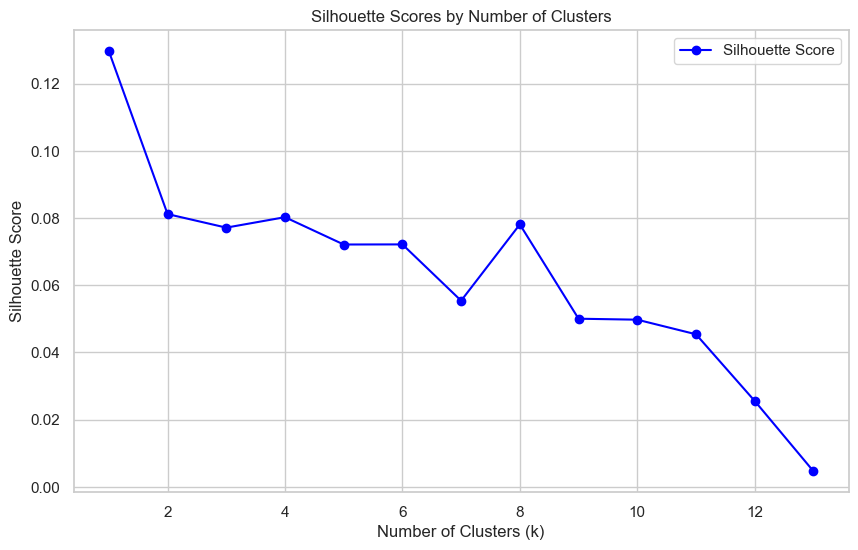

Silhouette score for best kappa: 0.171


In [15]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

text_col='content'

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_sum_3, kmeans_results = calc_clusters_with_kmeans(df=df_sum_3, text_col=text_col, max_token_length=1000, is_pca=(True, 16))

In [16]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_3 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [17]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col = 'content'
language = 'English'
topic = "NSA surveillance and intelligence operations"

# produce the summaries for grouped comments by label
summaries_3 =summarize_comments_by_cluster(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_3, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_3 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 0
The comments on NSA surveillance and intelligence operations provide a comprehensive overview of several key themes. The evolution of the NSA is highlighted, particularly its significant transformation since the events of September 11, 2001, and the subsequent funding boom. Reflecting on the wider implications of Edward Snowden’s disclosures, there is a consensus that the revelations undermined the agency's secrecy and prompted a public debate on privacy and national security. James R. Clapper Jr., alongside President Obama and other top intelligence officials, has been scrutinized for their roles in justifying and managing extensive surveillance programs.

Several comments delve into the technical prowess of the NSA, including its sophisticated eavesdropping capabilities and elite hacking operations like “Ironav,” demonstrating the agency's advanced technological edge. There are mentions of internal moral and ethical standards that intelligence professiona

In [18]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 3rd technique
final_summary_3 = final_summary_of_clustered_comments(prompt=prompt_template_final_3, gpt_model='gpt-4o', topic=topic, summaries=summaries_3)

The comments on NSA surveillance and intelligence operations offer a detailed and multifaceted overview of the agency’s evolution, capabilities, and the controversies surrounding it. Post-9/11 transformations and increased funding are significant points, along with the impact of Edward Snowden’s disclosures, which ignited public debates on privacy and national security. High-profile figures like James R. Clapper Jr. and President Obama are scrutinized for their roles in managing surveillance programs.

Technically, the NSA demonstrates advanced capabilities in eavesdropping, hacking, and global intelligence gathering, exemplified by operations monitoring communications from figures such as Ayatollah Khamenei’s aides and Iranian air defense systems. The agency's adaptability to rapid technological advancements and its operational adjustments are constantly highlighted.

Internal discussions reflect on the moral and ethical standards intelligence professionals are expected to uphold, bal

### 4TH SUMMARIZATION TECHNIQUE: TOPICS EXTRACTION OF COMMENTS, CLUSTER TOPICS AND SUMMARY THE CLUSTERS

We are going to implement our final technique in which we hope to be the best. Initially, we are going to extract topics for each comment/review. Moreover, we are going to cluster them with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

In [19]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_topics = load_chosen_prompt(prompt_name='prompt_for_topic_extraction')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['topic', 'language', 'topics', 'comment']


In [20]:
from summarization_methods.topic_extraction_clustering_and_summarization import topic_extraction

topic = "NSA surveillance and intelligence operations"
language = 'English'

# extract topics using llm's (openai gpt-4o)
df_sum_3, df_topics_3 = topic_extraction(df=df_sum_3, text_col='content', prompt_template=prompt_template_topics, gpt_model='gpt-4o', topic=topic, language=language)

print('--------------------------------------------------------------------------------------------------------------------------------')
print(f'The length of the topics that produced are: {len(df_topics_3)}')
print(f'The columns of the new dataframe are: {df_topics_3.columns}')

  1%|██▊                                                                                                                                                                                                        | 1/71 [00:00<00:41,  1.70it/s]

extracted topics: ['NSA history', 'Evolution of surveillance capabilities', 'Legislation changes', 'Impact of 9/11 attacks']


  3%|█████▋                                                                                                                                                                                                     | 2/71 [00:01<00:45,  1.51it/s]

extracted topics: []


  4%|████████▌                                                                                                                                                                                                  | 3/71 [00:01<00:44,  1.51it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance', 'American intelligence strategy', 'Secretive operations', 'Surveillance on allies', 'Economic and diplomatic advantage through surveillance']


  6%|███████████▍                                                                                                                                                                                               | 4/71 [00:02<00:40,  1.67it/s]

extracted topics: ['Surveillance on allies', 'Foreign target surveillance', 'NSA operational highlights']


  7%|██████████████▎                                                                                                                                                                                            | 5/71 [00:02<00:37,  1.77it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance', 'American intelligence strategy']


  8%|█████████████████▏                                                                                                                                                                                         | 6/71 [00:03<00:39,  1.63it/s]

extracted topics: ['Edward Snowden disclosures', 'Public debate on NSA mission', 'Crisis of purpose and legitimacy for NSA', 'Review of domestic and foreign intelligence collection', 'American surveillance and privacy concerns', 'Global reaction to American surveillance']


 10%|████████████████████                                                                                                                                                                                       | 7/71 [00:04<00:38,  1.68it/s]

extracted topics: ['Foreign target surveillance', 'American surveillance and privacy concerns', 'Global reaction to American surveillance', 'Economic and diplomatic advantage through surveillance']


 11%|██████████████████████▊                                                                                                                                                                                    | 8/71 [00:04<00:38,  1.62it/s]

extracted topics: ['Edward Snowden disclosures', 'Review of domestic and foreign intelligence collection', 'Global reaction to American surveillance', 'Surveillance on allies', 'Economic and diplomatic advantage through surveillance']


 13%|█████████████████████████▋                                                                                                                                                                                 | 9/71 [00:05<00:38,  1.60it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance', 'American intelligence strategy', 'Surveillance on allies', 'Economic and diplomatic advantage through surveillance']


 14%|████████████████████████████▍                                                                                                                                                                             | 10/71 [00:06<00:40,  1.49it/s]

extracted topics: ['Edward Snowden disclosures', 'Public debate on NSA mission', 'Crisis of purpose and legitimacy for NSA', 'Review of domestic and foreign intelligence collection', 'American surveillance and privacy concerns', 'Global reaction to American surveillance']


 15%|███████████████████████████████▎                                                                                                                                                                          | 11/71 [00:06<00:39,  1.54it/s]

extracted topics: ['American surveillance and privacy concerns', 'Global reaction to American surveillance', 'American intelligence strategy']


 17%|██████████████████████████████████▏                                                                                                                                                                       | 12/71 [00:07<00:39,  1.51it/s]

extracted topics: ['Edward Snowden disclosures', 'Review of domestic and foreign intelligence collection', 'Global reaction to American surveillance', 'NSA operational highlights', 'American surveillance and privacy concerns']


 18%|████████████████████████████████████▉                                                                                                                                                                     | 13/71 [00:08<00:36,  1.57it/s]

extracted topics: ['NSA operational highlights', 'American intelligence strategy', 'Surveillance on allies', 'Foreign target surveillance']


 20%|███████████████████████████████████████▊                                                                                                                                                                  | 14/71 [00:08<00:34,  1.63it/s]

extracted topics: ['NSA operational highlights', 'American intelligence strategy', 'Public debate on NSA mission']


 21%|██████████████████████████████████████████▋                                                                                                                                                               | 15/71 [00:09<00:32,  1.72it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance', 'American intelligence strategy']


 23%|█████████████████████████████████████████████▌                                                                                                                                                            | 16/71 [00:09<00:30,  1.79it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 24%|████████████████████████████████████████████████▎                                                                                                                                                         | 17/71 [00:10<00:29,  1.86it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 25%|███████████████████████████████████████████████████▏                                                                                                                                                      | 18/71 [00:10<00:27,  1.90it/s]

extracted topics: ['Surveillance on allies', 'Foreign target surveillance']


 27%|██████████████████████████████████████████████████████                                                                                                                                                    | 19/71 [00:11<00:27,  1.87it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance', 'American intelligence strategy']


 28%|████████████████████████████████████████████████████████▉                                                                                                                                                 | 20/71 [00:11<00:28,  1.79it/s]

extracted topics: ['Edward Snowden disclosures', 'Review of domestic and foreign intelligence collection', 'NSA operational highlights', 'American surveillance and privacy concerns']


 30%|███████████████████████████████████████████████████████████▋                                                                                                                                              | 21/71 [00:12<00:27,  1.84it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance', 'American intelligence strategy']


 31%|██████████████████████████████████████████████████████████████▌                                                                                                                                           | 22/71 [00:12<00:25,  1.90it/s]

extracted topics: ['NSA operational highlights', 'American intelligence strategy']


 32%|█████████████████████████████████████████████████████████████████▍                                                                                                                                        | 23/71 [00:13<00:25,  1.86it/s]

extracted topics: ['NSA operational highlights', 'Edward Snowden disclosures', 'Foreign target surveillance', 'American intelligence strategy']


 34%|████████████████████████████████████████████████████████████████████▎                                                                                                                                     | 24/71 [00:13<00:24,  1.91it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 35%|███████████████████████████████████████████████████████████████████████▏                                                                                                                                  | 25/71 [00:14<00:23,  1.93it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 37%|█████████████████████████████████████████████████████████████████████████▉                                                                                                                                | 26/71 [00:14<00:23,  1.95it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 38%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                             | 27/71 [00:15<00:21,  2.01it/s]

extracted topics: ['Foreign target surveillance']


 39%|███████████████████████████████████████████████████████████████████████████████▋                                                                                                                          | 28/71 [00:15<00:20,  2.08it/s]

extracted topics: ['Foreign target surveillance', 'NSA operational highlights']


 41%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                                                       | 29/71 [00:16<00:25,  1.64it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 42%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                    | 30/71 [00:17<00:24,  1.68it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 44%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                 | 31/71 [00:17<00:22,  1.80it/s]

extracted topics: ['Foreign target surveillance']


 45%|███████████████████████████████████████████████████████████████████████████████████████████                                                                                                               | 32/71 [00:18<00:22,  1.70it/s]

extracted topics: ['NSA operational highlights']


 46%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                            | 33/71 [00:18<00:21,  1.78it/s]

extracted topics: ['NSA operational highlights', 'American intelligence strategy', 'Foreign target surveillance']


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                         | 34/71 [00:19<00:19,  1.85it/s]

extracted topics: ['NSA operational highlights', 'American surveillance and privacy concerns']


 49%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                      | 35/71 [00:20<00:19,  1.83it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                   | 36/71 [00:20<00:18,  1.85it/s]

extracted topics: ['NSA operational highlights', 'American surveillance and privacy concerns']


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 37/71 [00:21<00:18,  1.88it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 54%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                              | 38/71 [00:21<00:17,  1.88it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance', 'American intelligence strategy']


 55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                           | 39/71 [00:22<00:16,  1.94it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 40/71 [00:22<00:15,  2.05it/s]

extracted topics: []


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 41/71 [00:22<00:14,  2.04it/s]

extracted topics: ['NSA operational highlights', 'American intelligence strategy']


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                  | 42/71 [00:23<00:14,  2.07it/s]

extracted topics: ['NSA operational highlights']


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 43/71 [00:23<00:13,  2.07it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                            | 44/71 [00:24<00:13,  1.93it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 45/71 [00:25<00:13,  1.97it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 46/71 [00:25<00:12,  2.00it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 47/71 [00:25<00:11,  2.01it/s]

extracted topics: ['Foreign target surveillance', 'NSA operational highlights']


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 48/71 [00:26<00:11,  2.05it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 49/71 [00:27<00:13,  1.61it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 50/71 [00:27<00:12,  1.62it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance', 'American intelligence strategy']


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 51/71 [00:28<00:11,  1.69it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 52/71 [00:29<00:12,  1.58it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 53/71 [00:29<00:10,  1.75it/s]

extracted topics: []


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 54/71 [00:30<00:09,  1.81it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 55/71 [00:30<00:08,  1.84it/s]

extracted topics: ['Foreign target surveillance', 'American intelligence strategy']


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 56/71 [00:31<00:08,  1.83it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 57/71 [00:31<00:07,  1.88it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 58/71 [00:32<00:06,  1.95it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 59/71 [00:32<00:06,  1.98it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 60/71 [00:33<00:05,  2.05it/s]

extracted topics: ['NSA operational highlights']


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 61/71 [00:34<00:07,  1.26it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 62/71 [00:35<00:06,  1.43it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 63/71 [00:35<00:05,  1.57it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 64/71 [00:36<00:03,  1.76it/s]

extracted topics: []


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 65/71 [00:36<00:03,  1.81it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 66/71 [00:37<00:02,  1.88it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 67/71 [00:37<00:02,  1.88it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 68/71 [00:38<00:01,  1.89it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 69/71 [00:38<00:01,  1.95it/s]

extracted topics: ['NSA operational highlights', 'Foreign target surveillance']


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 70/71 [00:39<00:00,  1.95it/s]

extracted topics: ['Foreign target surveillance', 'NSA operational highlights', 'American intelligence strategy']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:39<00:00,  1.79it/s]

extracted topics: ['NSA operational highlights', 'American intelligence strategy']
--------------------------------------------------------------------------------------------------------------------------------
The length of the topics that produced are: 171
The columns of the new dataframe are: Index(['comment', 'topics'], dtype='object')


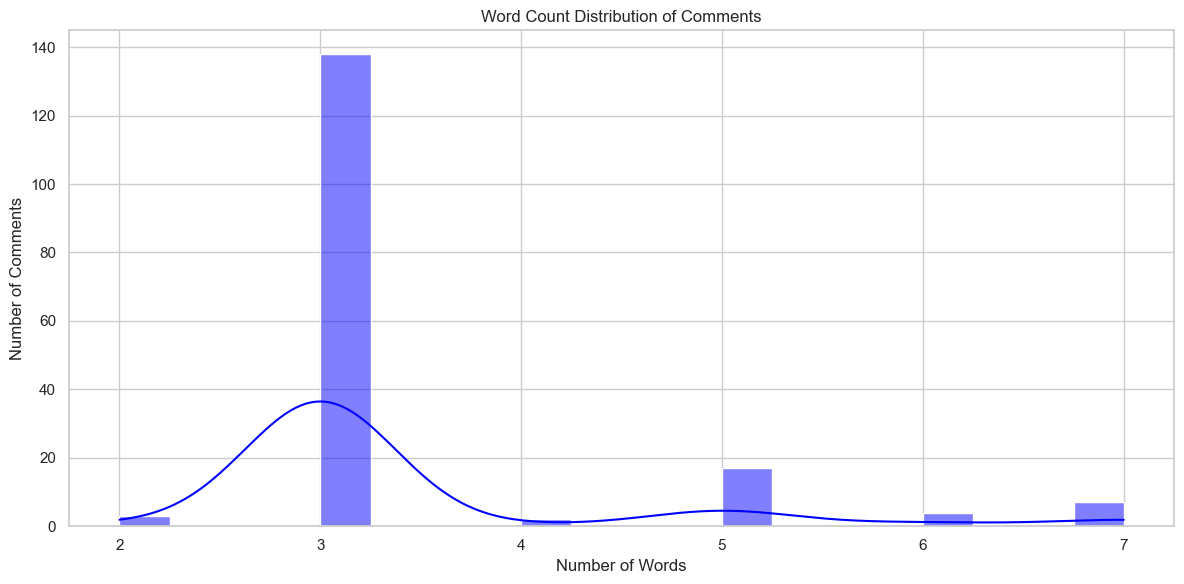

In [21]:
text_col='topics'

# plot the distribution of words
plot_distribution_of_words(df_topics_3, text_col)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:53<00:00,  3.19it/s]


Using PCA to transformed embeddings


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 33/49 [00:06<00:03,  4.75it/s]

The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 10


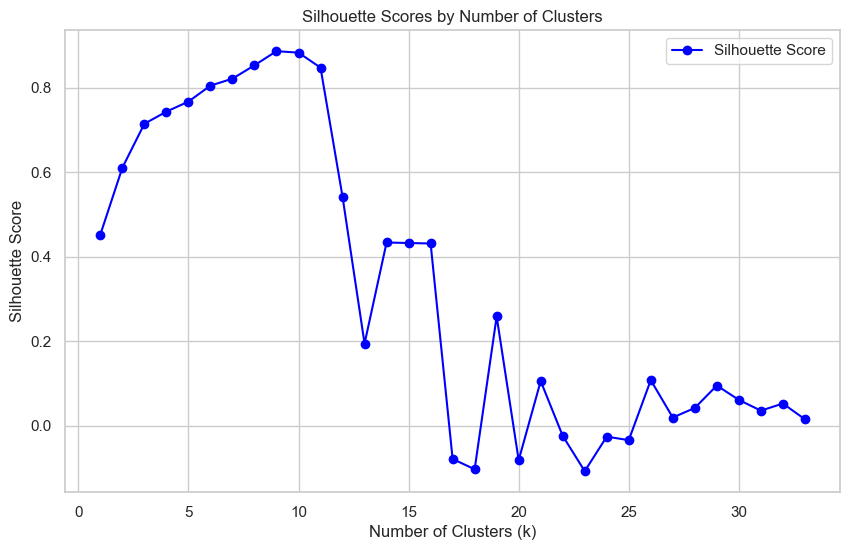

Silhouette score for best kappa: 0.924


In [24]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_topics_4, kmeans_results_2 = calc_clusters_with_kmeans(df=df_topics_3, text_col=text_col, max_token_length=4000, is_pca=(True, 16))

In [30]:
# rename the columns and merge the proper
df_sum_3 = df_sum_3.reset_index().rename(columns={'index': 'comment_id'})
df_topics_4 = df_topics_4.rename(columns={'comment': 'comment_id'})

df_topics_4 = df_topics_4.merge(df_sum_3[['content', 'comment_id']], how='inner', on='comment_id')

grouped_comments_4 = df_topics_4.groupby('labels').agg(
    comments=('content', lambda x: list(x)),
    topics=('topics', lambda x: set(x)),
    comments_count=('comment_id', lambda x: len(list(x)))
    )

grouped_comments_4 = grouped_comments_4.reset_index()

In [31]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_4 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [34]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col='comments'
language = 'English'
topic = "NSA surveillance and intelligence operations"

# produce the summaries for grouped comments by label
summaries_4 =summarize_comments_by_cluster(df=grouped_comments_4, text_col=text_col, prompt_name=prompt_template_4, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_4 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 0
The comments discuss the evolution of the NSA's surveillance and intelligence operations, highlighting concerns over privacy, legality, and government overreach. The evolution of the NSA's capabilities and technology is seen as both an asset for national security and a threat to individual freedoms. Several comments address the balance between ensuring public safety and protecting civil liberties, with arguments emphasizing the need for transparency and accountability in surveillance practices. Some users express distrust in government intentions and critique the lack of oversight and potential for abuse. Others underline the importance of the NSA in counterterrorism and securing national interests. There is a recurring call for clearer legal frameworks and reforms to ensure the ethical use of surveillance tools. The dichotomy of security versus privacy drives most of the discussion, reflecting a divided public opinion on the NSA's role in modern society.
-

In [35]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 4th technique
final_summary_4 = final_summary_of_clustered_comments(prompt=prompt_template_final_4, gpt_model='gpt-4o', topic=topic, summaries=summaries_4)

The discussion on NSA surveillance and intelligence operations reveals deep and multifaceted concerns about privacy, legality, and government overreach. While the NSA's advanced capabilities are acknowledged as crucial for national security and counterterrorism, there is significant apprehension about the threat these pose to individual freedoms. Edward Snowden's revelations are frequently cited as pivotal in raising awareness and prompting debate on these issues.

A recurrent theme is the tension between ensuring public safety and protecting civil liberties, with many calling for increased transparency, accountability, and robust oversight to prevent abuse of power. Trust in government intentions remains low, leading to widespread advocacy for clearer legal frameworks and ethical guidelines to ensure surveillance activities align with democratic principles.

Despite the unease, some comments highlight the NSA's essential role in national security, reflecting the complexity and divided

### STORE THE FINAL SUMMARIES IN A CSV

In [38]:
final_summaries = {
    'original_summary': original_summary, 
    'random_grouping_summarization': final_summary_1,
    'label_based_summarization': final_summary_2,
    'cluster_based_summarization': final_summary_3,
    'topic_extraction_cluster_based_summarization': final_summary_4
}

# Convert dictionary to DataFrame, with the keys as 'technique' and values as 'summary'
final_summaries_df = pd.DataFrame.from_dict(final_summaries, orient='index', columns=['summary']).reset_index()
final_summaries_df.rename(columns={'index': 'technique'}, inplace=True)

final_summaries_df.to_csv('outputs/final_summaries.csv', index=False)

In [39]:
final_summaries_df

,technique,summary
0,original_summary,"– a lengthy report in the new york times , bas..."
1,random_grouping_summarization,The comments on NSA surveillance and intellige...
2,label_based_summarization,The comments discuss various aspects of NSA su...
3,cluster_based_summarization,The comments on NSA surveillance and intellige...
4,topic_extraction_cluster_based_summarization,The discussion on NSA surveillance and intelli...


In [40]:
import pandas as pd

final_summaries_df = pd.read_csv('outputs/final_summaries.csv')

### BENCMARKING BASED ON THE EXTRACTED SUMMARIES OF THE THREE (3) TECHNIQUES

The evaluation will become by using these metrics: ROUGE score, BLEU score and BERTScore

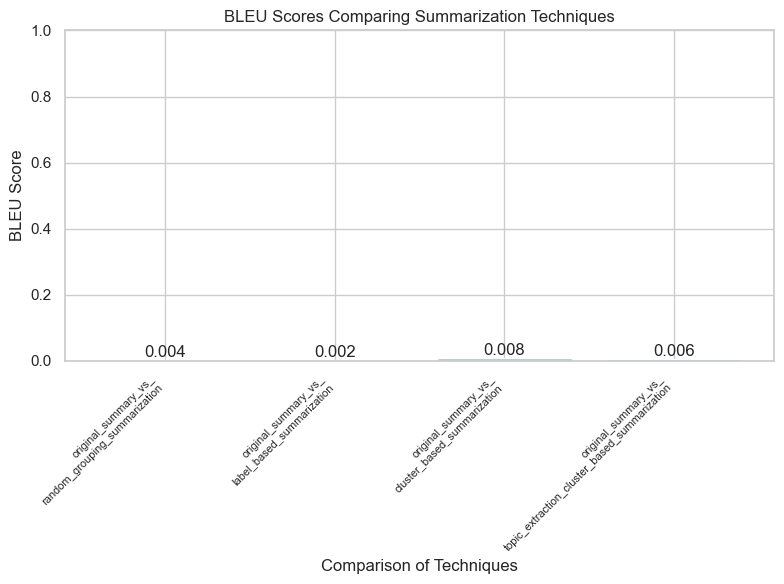

In [41]:
from utils.benchmark_summaries import calc_and_plot_bleu_scores

bleu_scores = calc_and_plot_bleu_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

In [45]:
for summary in final_summaries_df.summary:
    print(summary)
    print('---------------------------------------------------------------------------------')

– a lengthy report in the new york times , based on thousands of documents shared by the guardian via edward snowden , offers an in-depth look at an agency that can " seem omniscient , " with eyes everywhere tracking even the smallest matters . the material obtained — whether years of stored text messages , " gigabytes of credit card purchases , " or eavesdropped conversations — can be of great value : scott shane writes about operations that stopped a terrorist plot against a swedish illustrator , helped kennedy international airport battle chinese human smugglers , and gave the colombian army details of farc rebel plans . but plenty of collected data is never looked at , despite the effort to obtain it . and some material seems hardly useful ; the paper cites the agency ' s successful grab at un secretary-general ban ki-moon ' s talking points for a meeting with president obama . meanwhile , despite the nsa ' s incredible reach in afghanistan , it hasn ' t offered a path to " clear-c

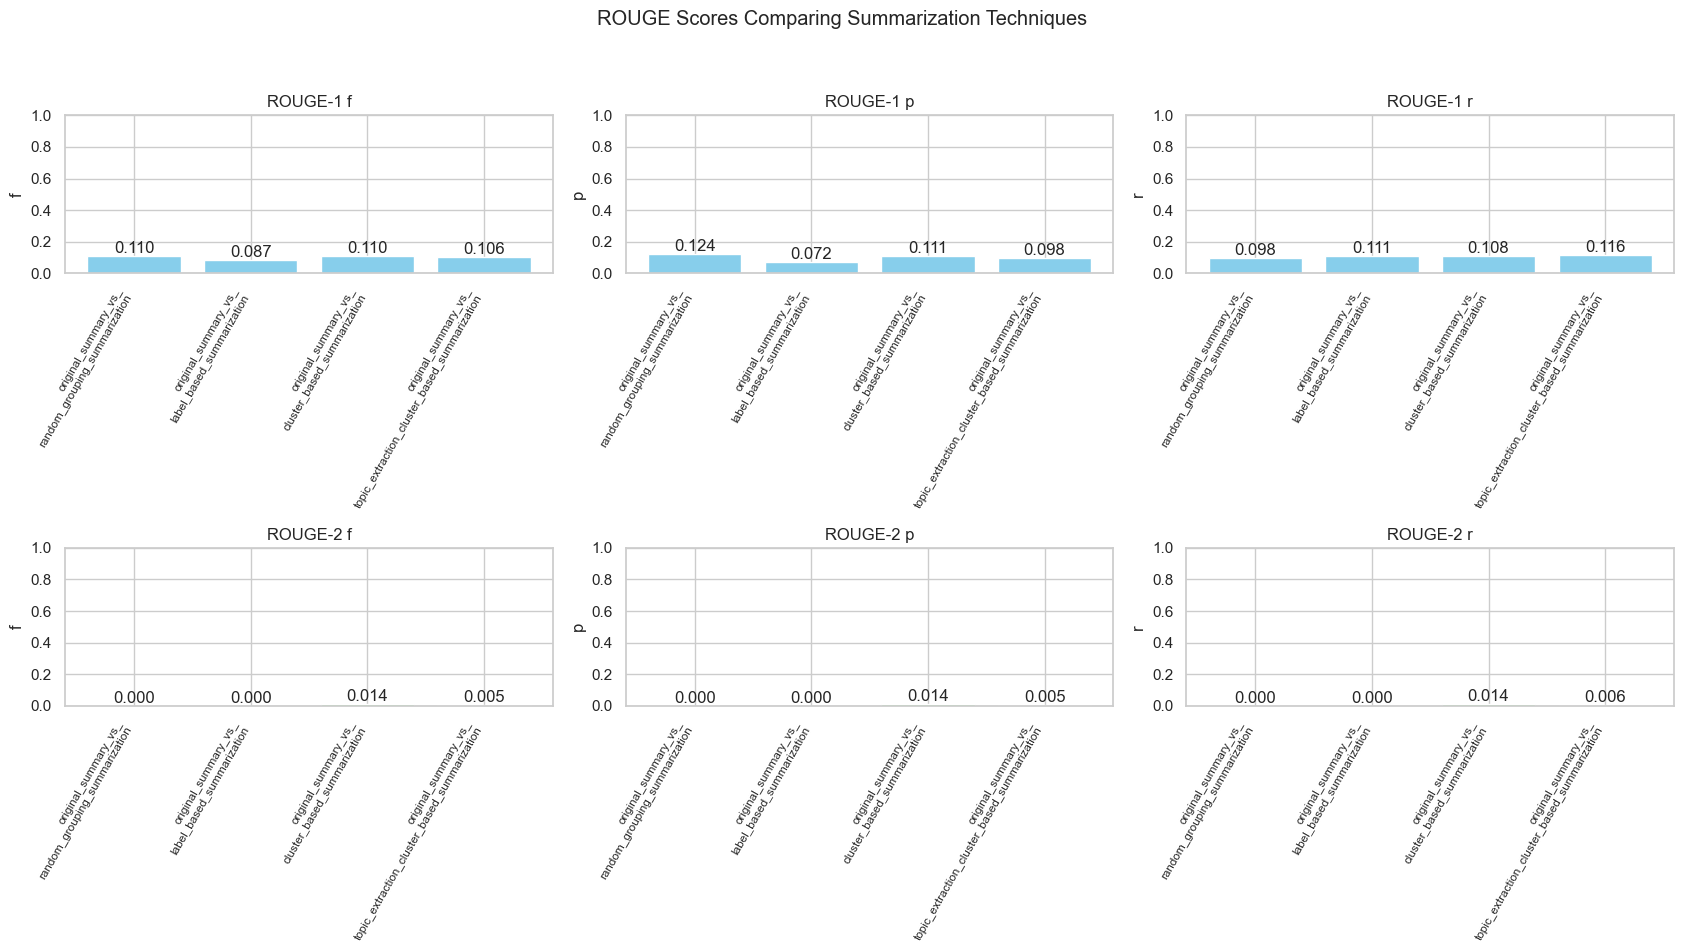

In [42]:
from utils.benchmark_summaries import calc_and_plot_rouge_scores

rouge_scores = calc_and_plot_rouge_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


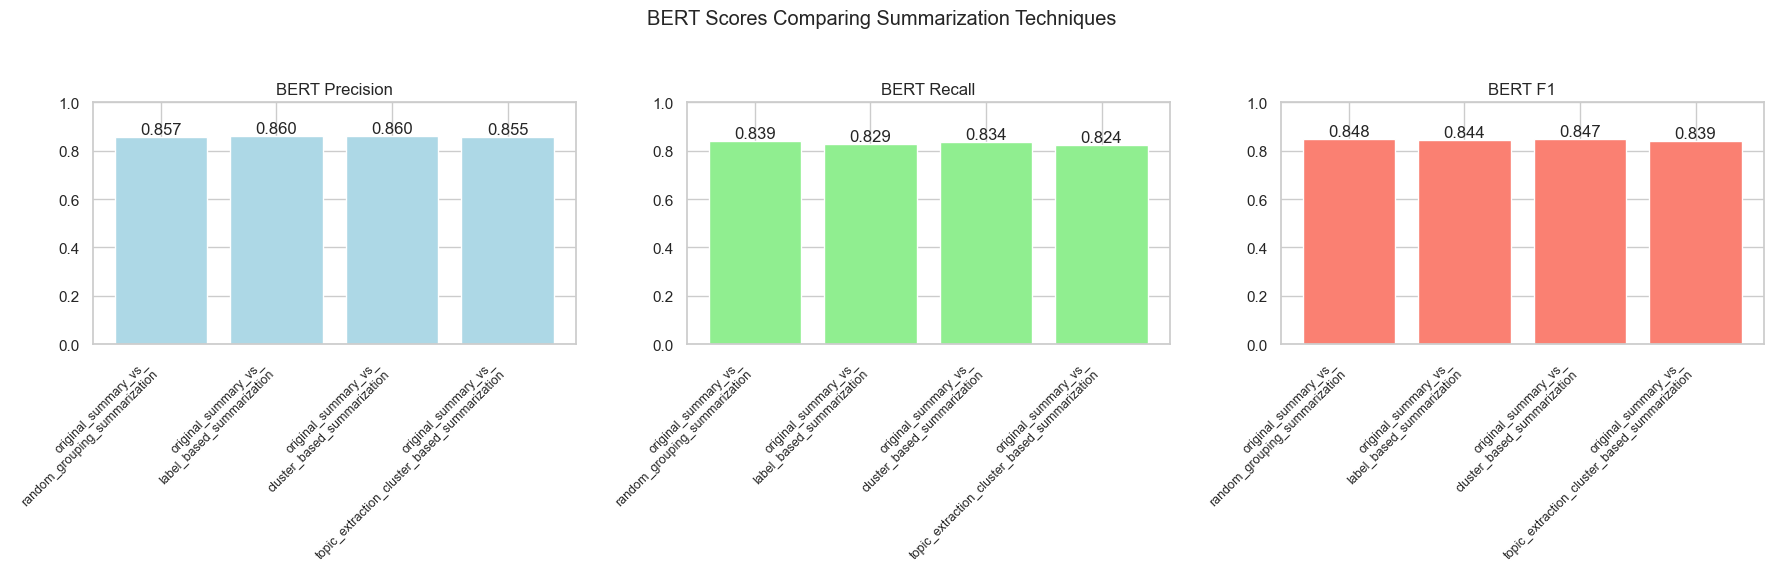

In [43]:
from utils.benchmark_summaries import calc_and_plot_bert_scores

bert_scores = calc_and_plot_bert_scores(summaries_df=final_summaries_df,
                                        text_col='summary',
                                        title_col='technique',
                                        model_to_use='princeton-nlp/sup-simcse-roberta-large',
                                        text_lang='en')